In [2]:
%matplotlib inline

import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
input_file = "../data/raw/energy.csv"
#output_path = "../../data/synthetic_fishing/"


In [4]:
full_data = pd.read_csv(input_file, index_col=0)


In [5]:
# Check for NaN or null values in the dataset
nan_summary = full_data.isnull().sum()

# Total number of NaN values in the dataset
total_nan = full_data.isnull().sum().sum()

# Display columns with NaN values and their counts
print("NaN Counts Per Column:")
print(nan_summary[nan_summary > 0])  # Show only columns with NaN values

print(f"\nTotal number of NaN values in the dataset: {total_nan}")


NaN Counts Per Column:
Series([], dtype: int64)

Total number of NaN values in the dataset: 0


In [6]:
full_data.describe()


,conso,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,...,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000
mean,96.835866,3.802432,21.686138,40.262549,20.342054,40.423351,22.266861,39.241405,20.856308,39.026112,...,19.485795,41.551792,7.413435,755.519772,79.749088,4.040122,38.332523,3.762097,24.933725,24.933725
std,100.459209,7.954943,1.606259,3.992042,2.195577,4.072868,2.006131,3.254206,2.043188,4.343764,...,2.015741,4.154506,5.333517,7.405326,15.053694,2.491661,12.887158,4.206752,14.635032,14.635032
min,10.000000,0.000000,16.790000,27.926667,16.100000,21.230000,17.200000,28.860000,15.100000,28.424286,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.032817,0.032817
25%,50.000000,0.000000,20.737500,37.372500,18.790000,37.888750,20.790000,36.900000,19.500000,35.527500,...,18.000000,38.506667,3.700000,750.925000,70.000000,2.000000,28.000000,0.900000,12.415205,12.415205
50%,60.000000,0.000000,21.600000,39.650833,20.000000,40.500000,22.100000,38.537500,20.633333,38.400000,...,19.390000,40.900000,6.900000,756.100000,84.000000,4.000000,40.000000,3.500000,24.820163,24.820163
75%,100.000000,0.000000,22.600000,43.090000,21.500000,43.260000,23.290000,41.752500,22.100000,42.152500,...,20.600000,44.367262,10.400000,760.900000,92.000000,6.000000,40.000000,6.600000,37.629171,37.629171
max,910.000000,50.000000,26.200000,57.663333,29.663333,56.026667,29.236000,50.163333,26.140000,50.963333,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.981674,49.981674


In [7]:
full_data.columns


Index(['conso', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
full_data.info


<bound method DataFrame.info of                      conso  lights         T1       RH_1         T2  \
date                                                                  
2016-01-11 17:00:00     60      30  19.890000  47.596667  19.200000   
2016-01-11 18:00:00     60      50  19.890000  45.766667  19.200000   
2016-01-11 19:00:00    430      50  20.133333  48.000000  19.566667   
2016-01-11 20:00:00     80      30  20.890000  51.193333  20.200000   
2016-01-11 21:00:00    110      30  21.133333  46.060000  20.426667   
...                    ...     ...        ...        ...        ...   
2016-05-27 14:00:00    190      10  25.500000  47.060000  26.540000   
2016-05-27 15:00:00     60       0  25.500000  45.933333  26.277143   
2016-05-27 16:00:00    100       0  25.500000  45.730000  26.000000   
2016-05-27 17:00:00    110       0  25.600000  47.193333  25.968571   
2016-05-27 18:00:00    430      10  25.500000  46.600000  25.264286   

                          RH_2         T3   

In [9]:
full_data.head()


,conso,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.79,19.79,44.730000,19.000000,45.566667,...,17.033333,45.530000,6.6,733.5,92.0,7.0,63.0,5.3,13.275433,13.275433
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.50,19.79,44.900000,18.890000,45.790000,...,17.000000,45.290000,5.9,734.1,92.0,5.0,40.0,4.7,47.233763,47.233763
2016-01-11 19:00:00,430,50,20.133333,48.000000,19.566667,44.40,19.89,44.900000,19.000000,46.363333,...,16.963333,45.290000,6.0,734.5,91.0,6.0,40.0,4.6,34.351142,34.351142
2016-01-11 20:00:00,80,30,20.890000,51.193333,20.200000,46.33,20.20,48.193333,18.963333,48.630000,...,16.890000,45.200000,6.0,735.2,88.0,6.0,40.0,4.1,19.001759,19.001759
2016-01-11 21:00:00,110,30,21.133333,46.060000,20.426667,44.76,20.29,46.433333,19.390000,48.193333,...,16.890000,44.966667,6.0,735.4,87.0,6.0,40.0,3.9,13.361033,13.361033


In [10]:
full_data.tail()


,conso,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 14:00:00,190,10,25.5,47.060000,26.540000,41.000000,28.200000,41.530000,24.600000,45.863333,...,23.1,46.530000,22.0,755.8,59.0,2.0,22.0,13.6,41.515044,41.515044
2016-05-27 15:00:00,60,0,25.5,45.933333,26.277143,41.000000,28.356667,40.560000,24.666667,45.400000,...,23.1,46.590000,21.8,755.8,59.0,2.0,21.0,13.3,17.123315,17.123315
2016-05-27 16:00:00,100,0,25.5,45.730000,26.000000,41.428571,28.100000,40.433333,24.700000,45.433333,...,23.2,46.590000,22.8,755.5,55.0,2.0,23.0,13.2,18.215602,18.215602
2016-05-27 17:00:00,110,0,25.6,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,45.626667,...,23.2,46.751429,23.0,755.2,55.0,3.0,22.0,13.4,18.248201,18.248201
2016-05-27 18:00:00,430,10,25.5,46.600000,25.264286,42.971429,26.823333,41.156667,24.700000,45.963333,...,23.2,46.845000,22.2,755.2,57.0,4.0,27.0,13.2,34.118851,34.118851


In [7]:
df = full_data.copy()


In [12]:
l, sh, dim, siz = len(df), df.shape, df.ndim, df.size


In [13]:
print(l, sh, dim, siz)


3290 (3290, 28) 2 92120


In [14]:
rdf = df.to_numpy().reshape(df.shape[0], df.shape[1], 1)
rdf.shape


(3290, 28, 1)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

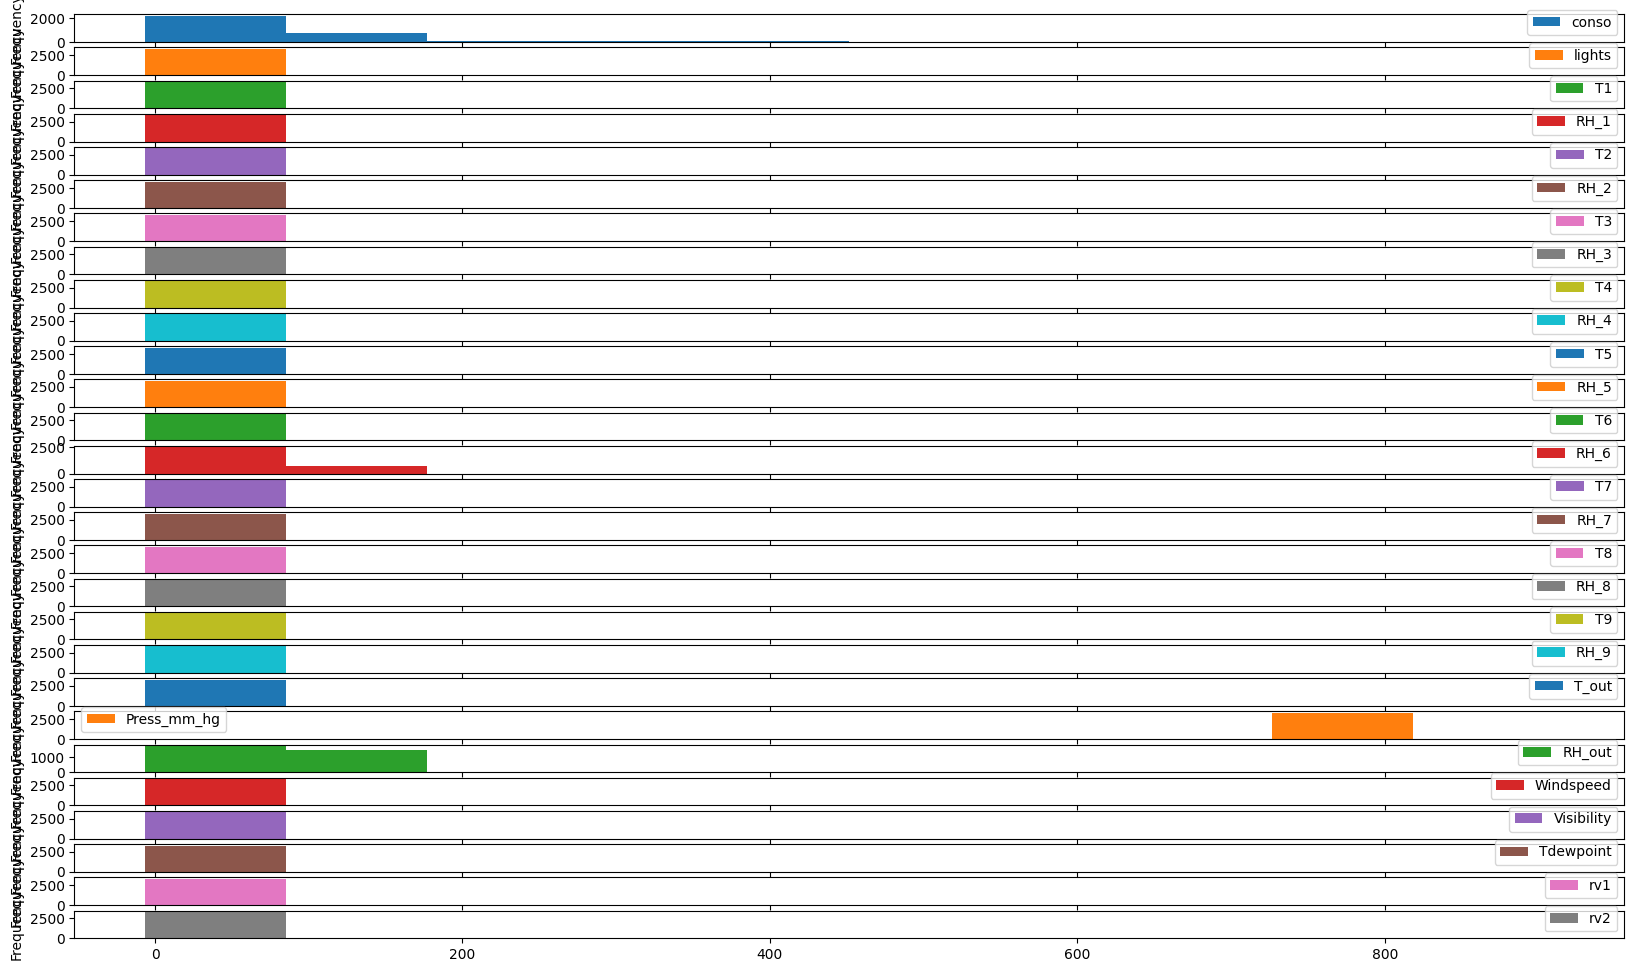

In [15]:
df.plot(kind='hist', subplots=True, figsize=(20, 12))


array([[<Axes: title={'center': 'conso'}>,
        <Axes: title={'center': 'lights'}>,
        <Axes: title={'center': 'T1'}>, <Axes: title={'center': 'RH_1'}>,
        <Axes: title={'center': 'T2'}>],
       [<Axes: title={'center': 'RH_2'}>, <Axes: title={'center': 'T3'}>,
        <Axes: title={'center': 'RH_3'}>, <Axes: title={'center': 'T4'}>,
        <Axes: title={'center': 'RH_4'}>],
       [<Axes: title={'center': 'T5'}>, <Axes: title={'center': 'RH_5'}>,
        <Axes: title={'center': 'T6'}>, <Axes: title={'center': 'RH_6'}>,
        <Axes: title={'center': 'T7'}>],
       [<Axes: title={'center': 'RH_7'}>, <Axes: title={'center': 'T8'}>,
        <Axes: title={'center': 'RH_8'}>, <Axes: title={'center': 'T9'}>,
        <Axes: title={'center': 'RH_9'}>],
       [<Axes: title={'center': 'T_out'}>,
        <Axes: title={'center': 'Press_mm_hg'}>,
        <Axes: title={'center': 'RH_out'}>,
        <Axes: title={'center': 'Windspeed'}>,
        <Axes: title={'center': 'Visibility'

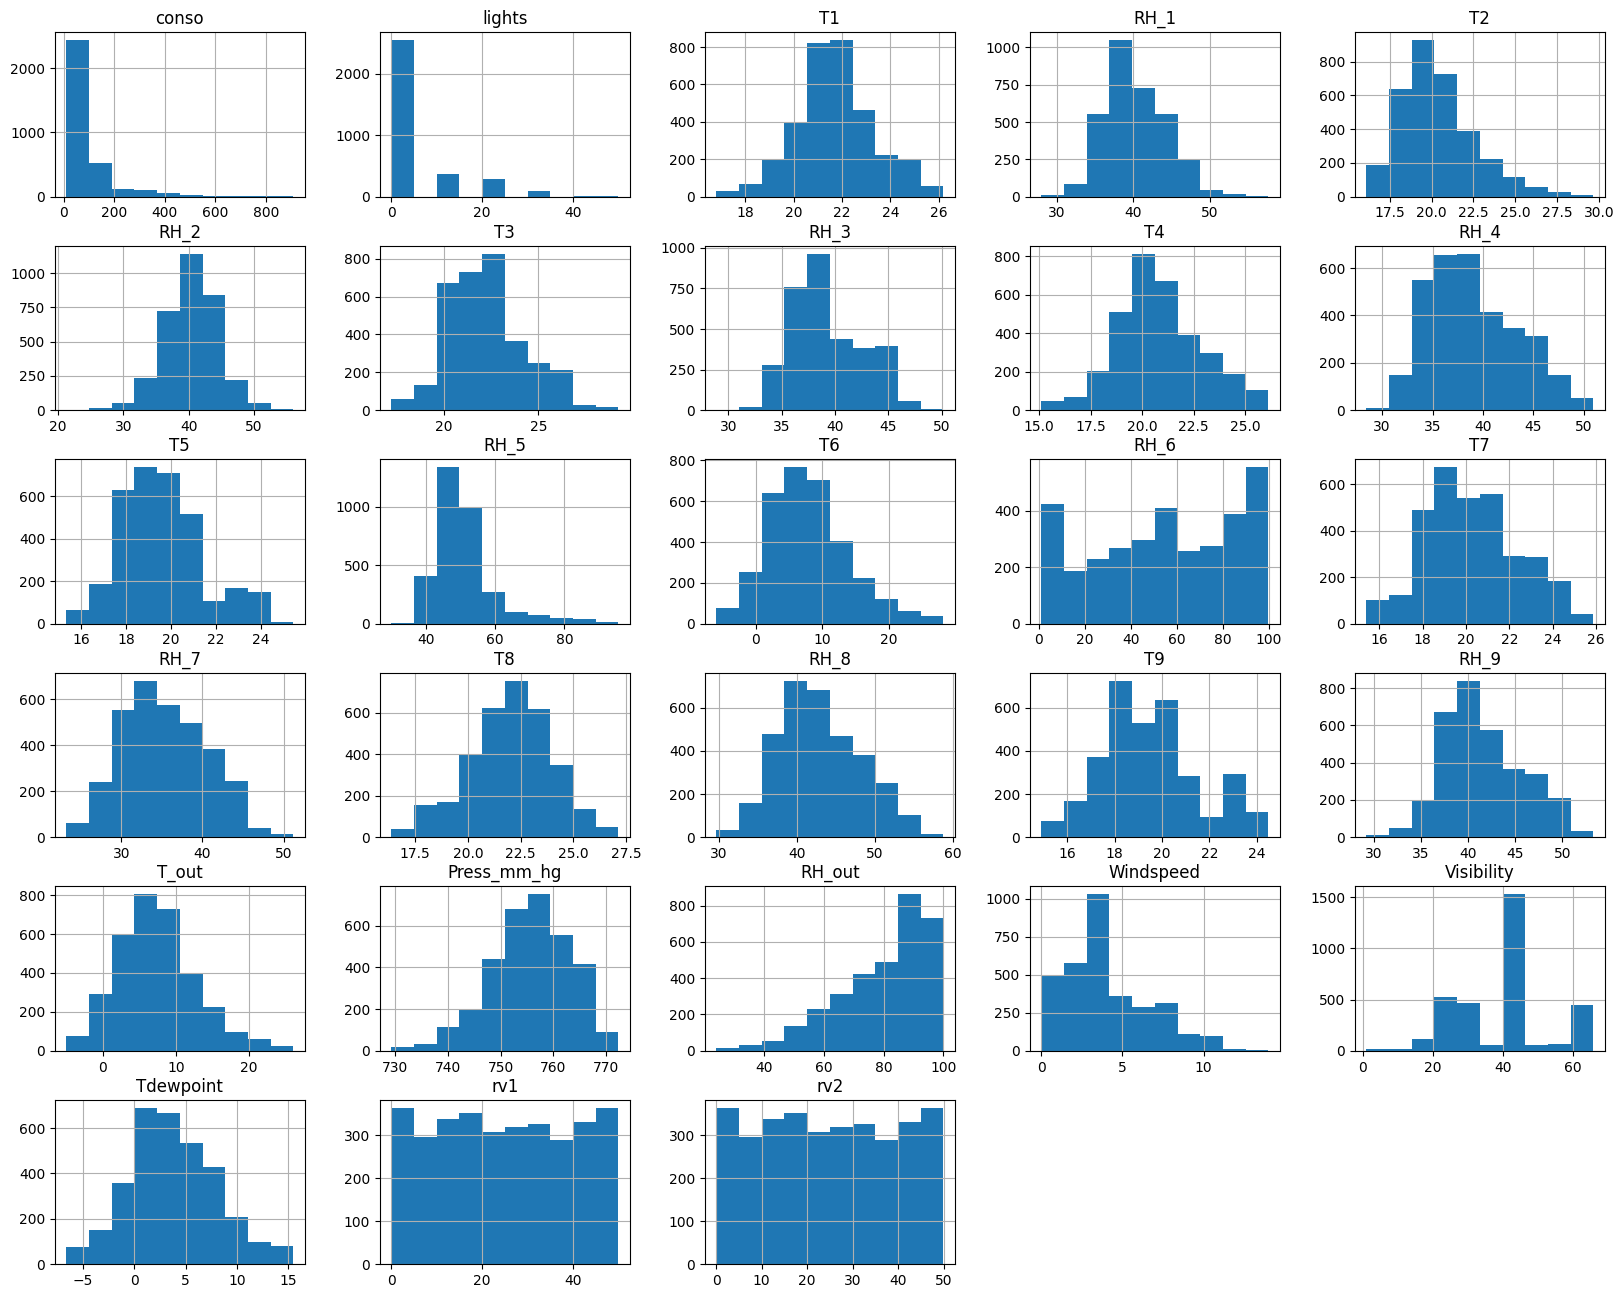

In [16]:
df.hist(figsize=(20, 16))


<Axes: xlabel='conso', ylabel='lights'>

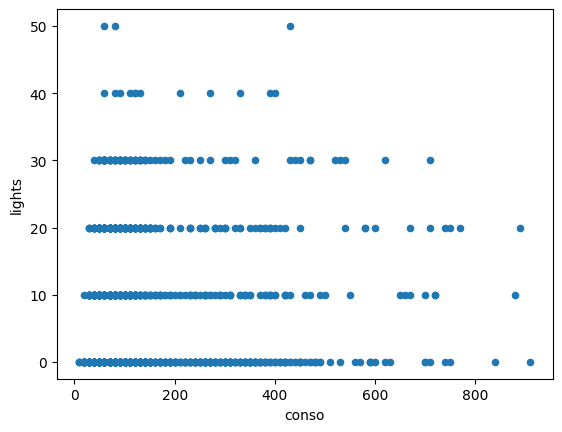

In [17]:
df.plot.scatter(x="conso", y="lights")


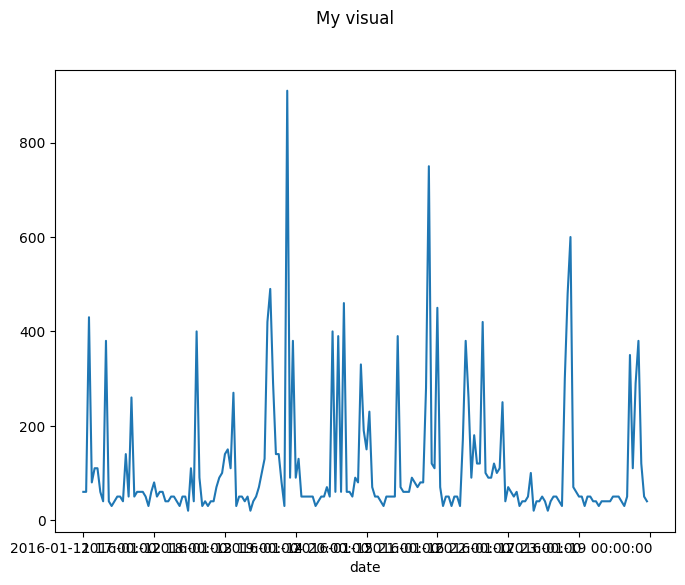

In [16]:
df[:200]["conso"].plot(subplots=True, figsize=(8, 6), title="My visual")
plt.show()


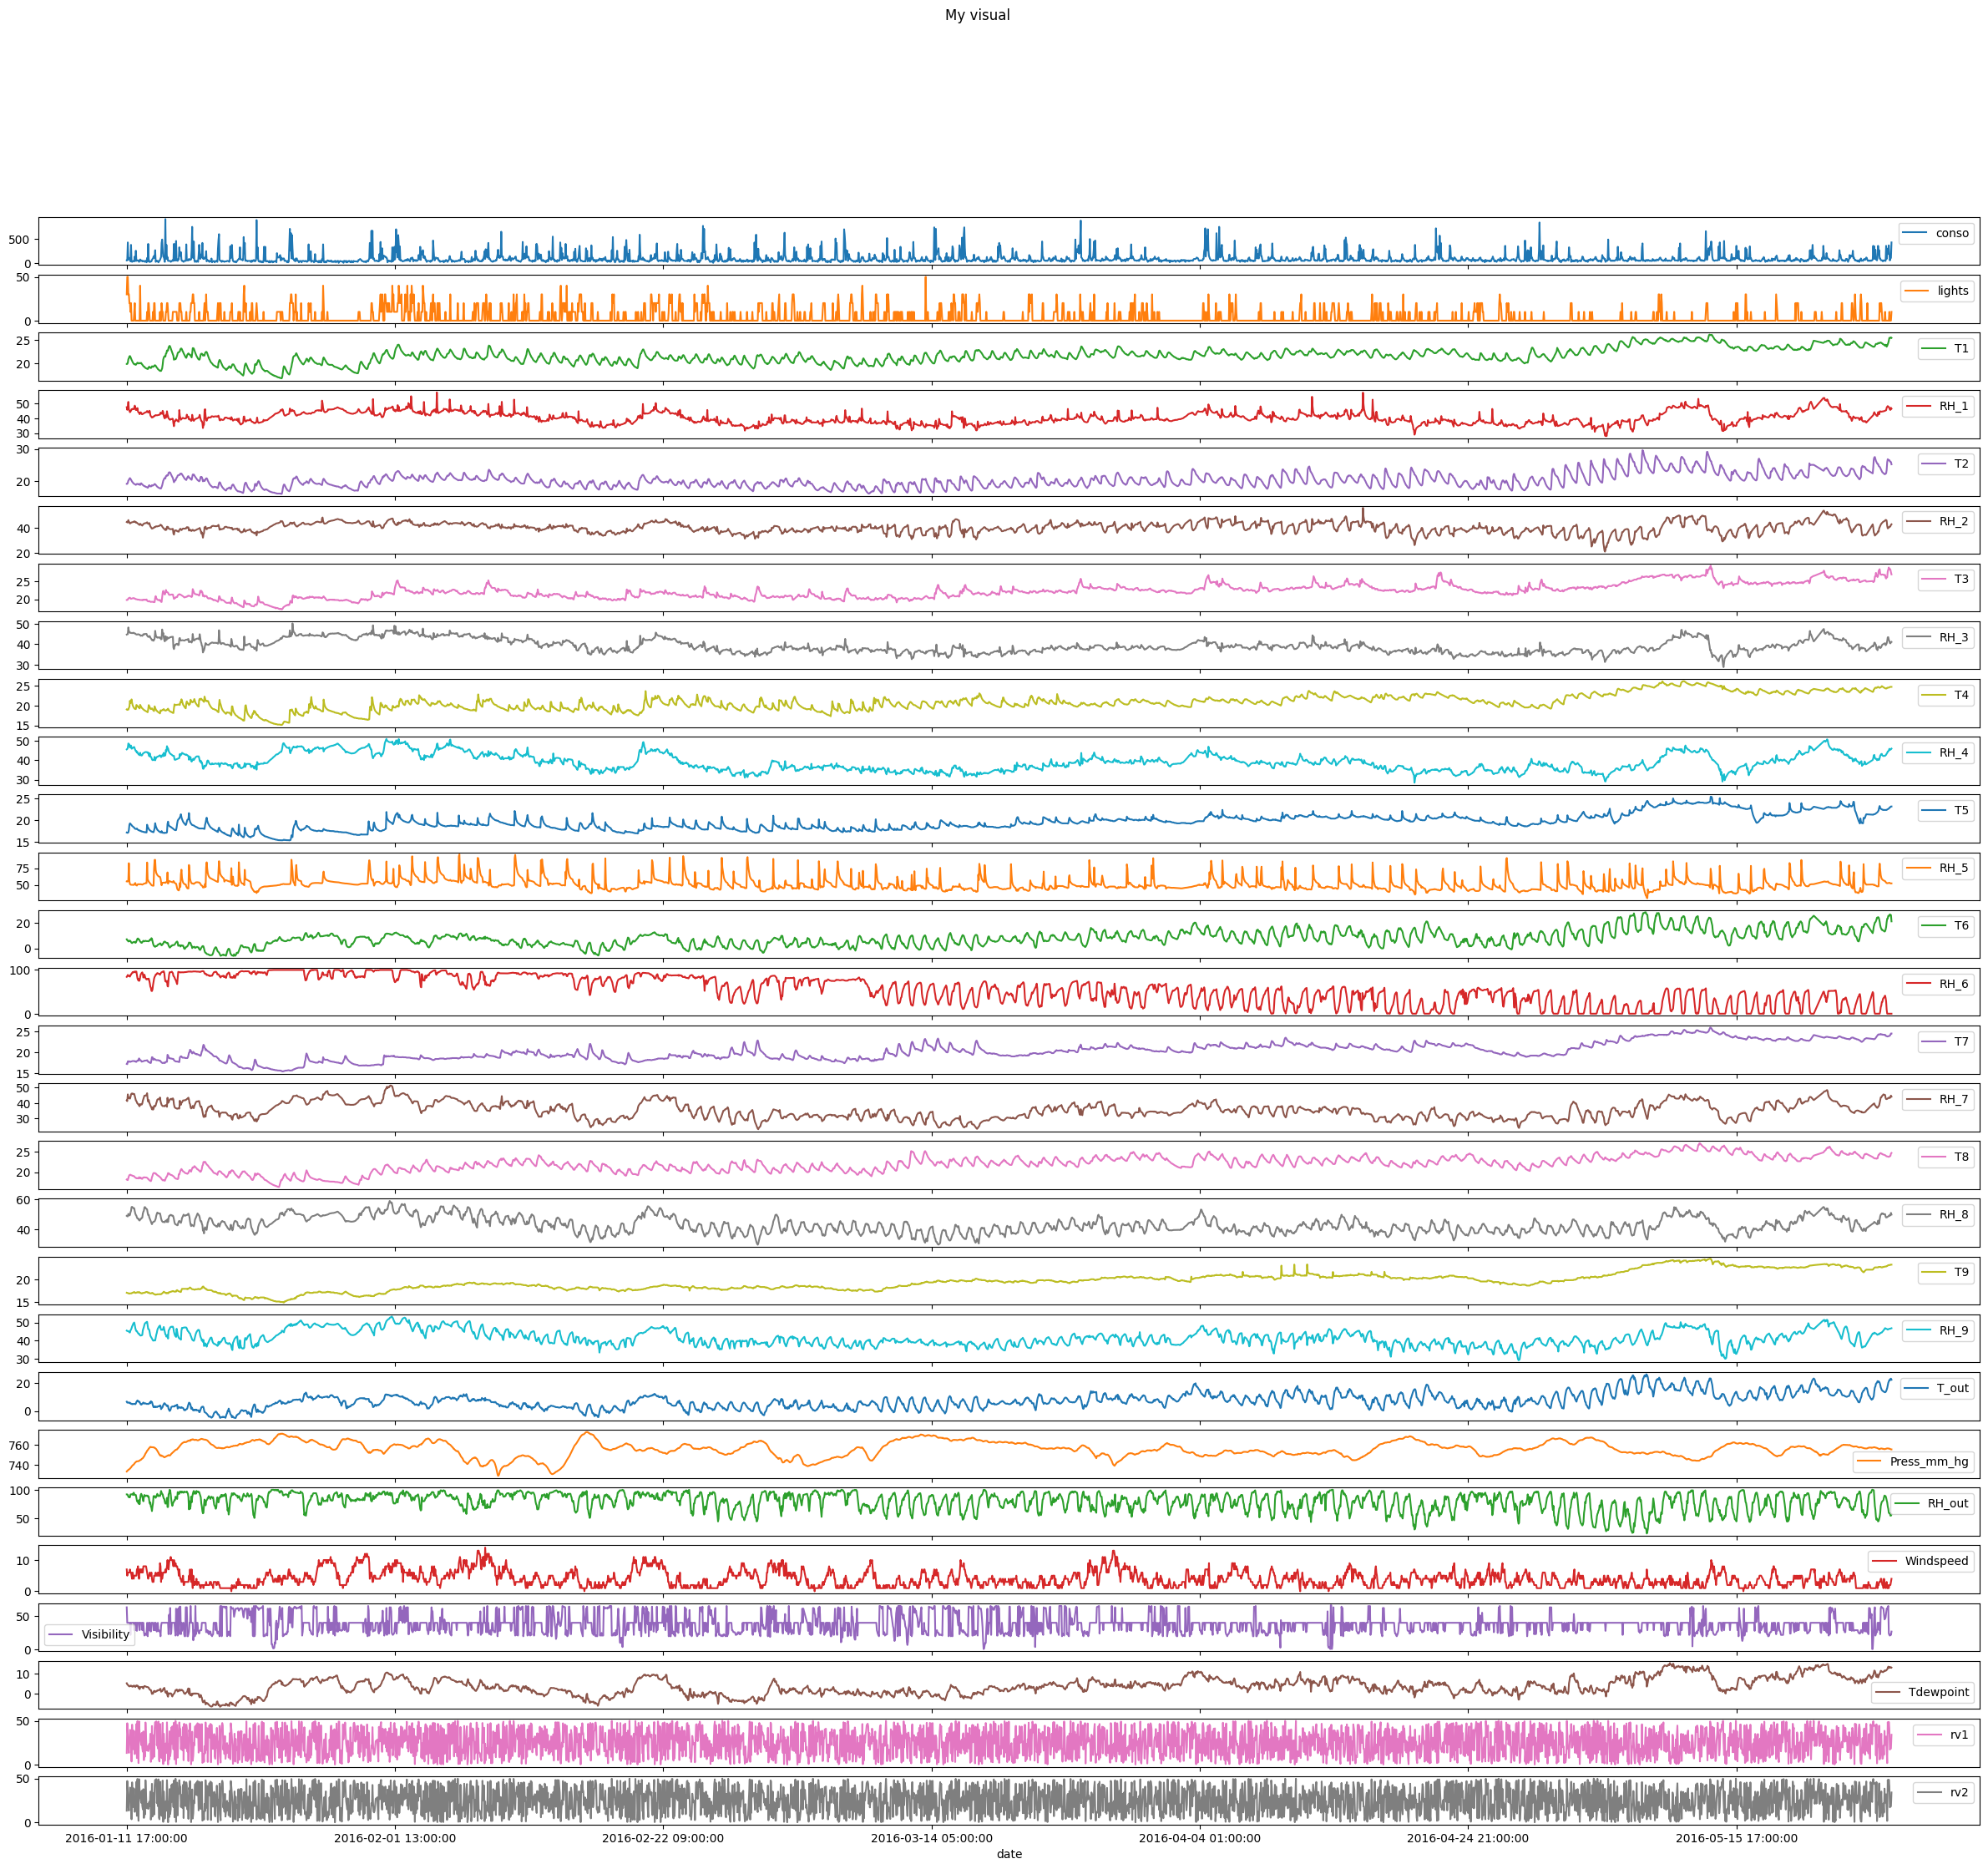

In [18]:
df.plot(subplots=True, figsize=(30, 25), title="My visual")
plt.show()


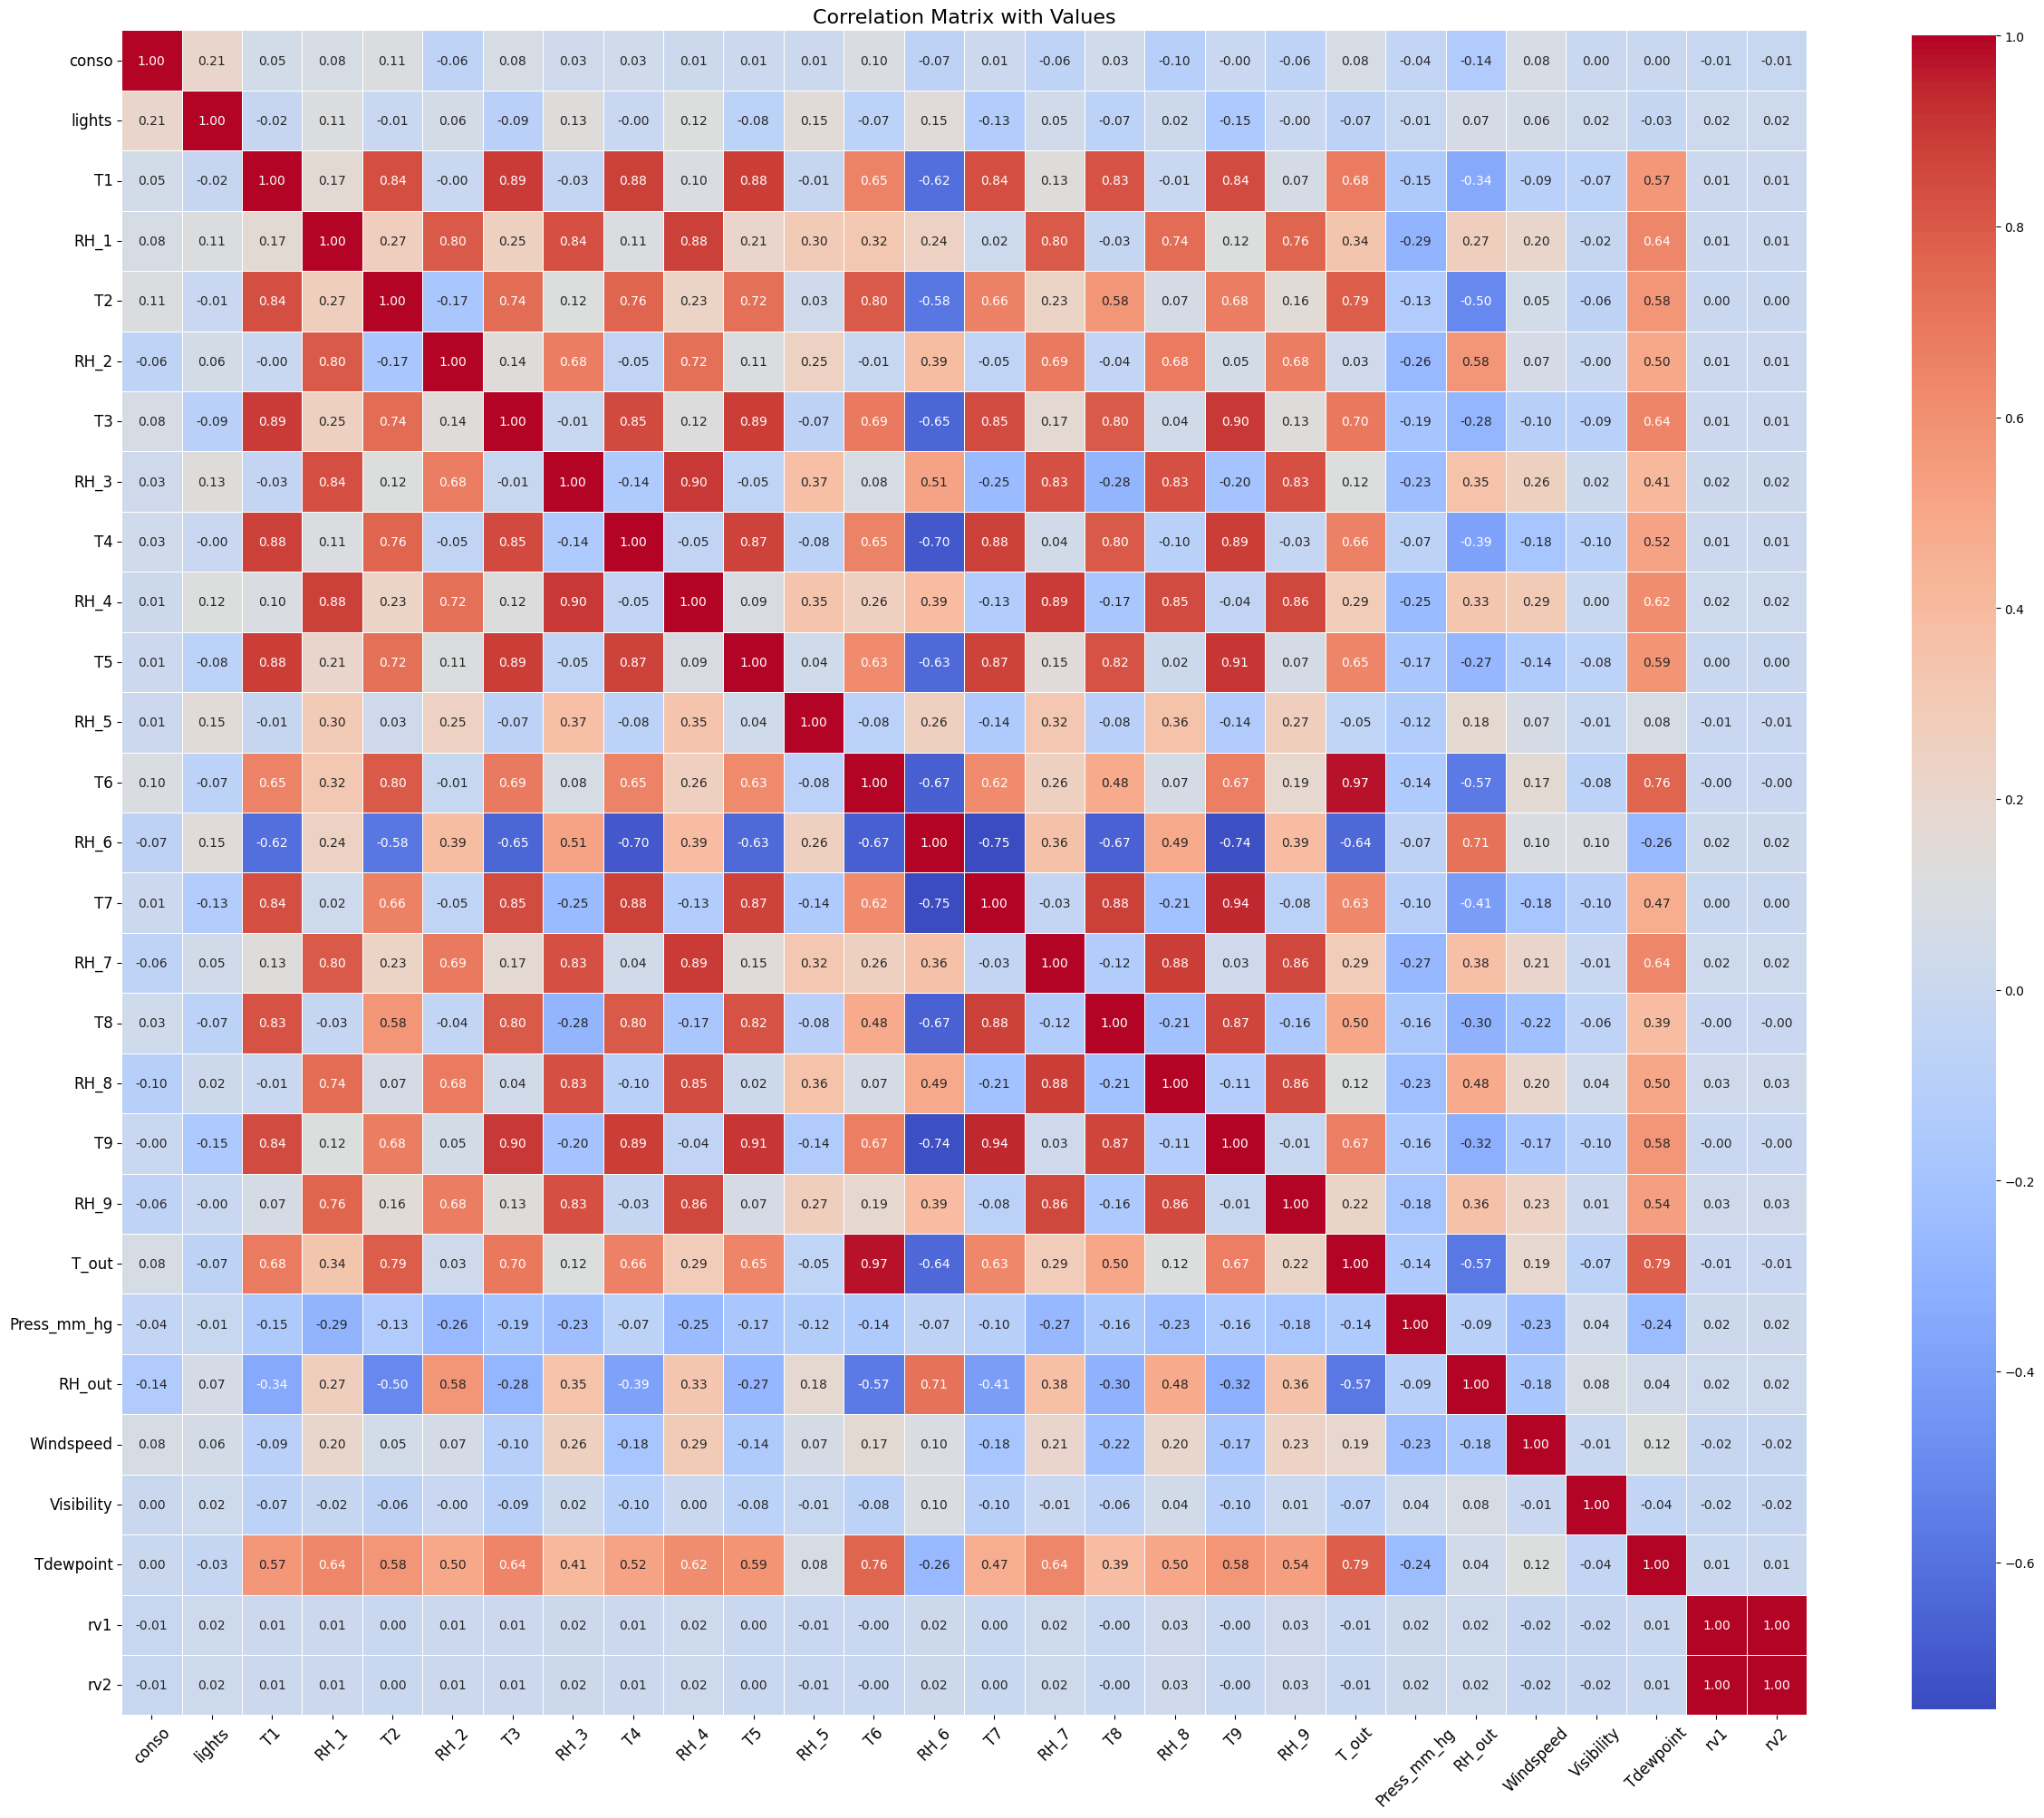

In [19]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(30, 30))  # Adjust figure size
sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values on the heatmap
    fmt=".2f",             # Format values to 2 decimal places
    cmap="coolwarm",       # Diverging color map (red = negative, blue = positive)
    square=True,           # Keep cells square-shaped
    linewidths=0.5,        # Add clear grid lines between cells
    cbar_kws={"shrink": 0.8}  # Shrink the color bar
)

# Add labels and a title
plt.title("Correlation Matrix with Values", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()


In [30]:
df_ = df.copy()
df_.drop(columns=['Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'rv1', 'rv2'], inplace=True)
save_path = "../data/raw/energy_data.csv"
df_.to_csv(save_path, index=True)
print(f"Processed dataset saved to {save_path}")


Processed dataset saved to ../data/raw/energy_data.csv


In [33]:
new_data = pd.read_csv(save_path, index_col=0)


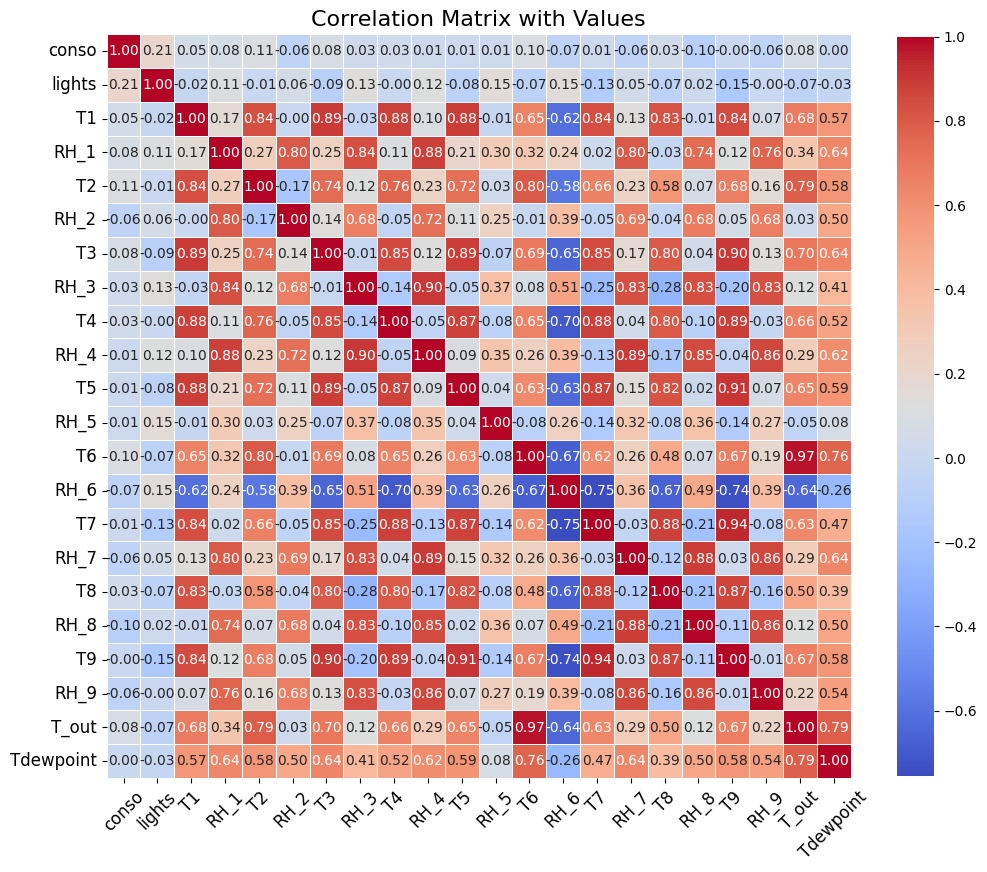

In [34]:
# Calculate the correlation matrix
corr_matrix = new_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))  # Adjust figure size
sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values on the heatmap
    fmt=".2f",             # Format values to 2 decimal places
    cmap="coolwarm",       # Diverging color map (red = negative, blue = positive)
    square=True,           # Keep cells square-shaped
    linewidths=0.5,        # Add clear grid lines between cells
    cbar_kws={"shrink": 0.8}  # Shrink the color bar
)

# Add labels and a title
plt.title("Correlation Matrix with Values", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()
